Ppoly Objects (polynomial)

In [1]:
import numpy as np 
import scipy
from scipy.interpolate import CubicSpline

In [2]:
from scipy.interpolate import CubicSpline
x = np.linspace(0, 10, 71)
y = np.sin(x)
spl = CubicSpline(x, y)


dspl = spl.derivative()

In [3]:
dspl(1.1), spl(1.1, nu=1)   #nu=1 is first derivative

(array(0.45361436), array(0.45361436))

In [4]:
dspl2 = dspl.derivative()
dspl2(1.1) , spl(1.1,nu=2)  #nu=2 is 2nd derivative.

(array(-0.89083079), array(-0.89083079))

In [6]:
dspl.roots() , dspl2.roots()   #zeros of the roots of derivatives.

(array([-1.42882152,  1.57079739,  4.71239208,  7.85398666, 10.87776434]),
 array([-1.83991769e-03,  3.14158846e+00,  6.28317714e+00,  9.42473952e+00]))

In [7]:
dspl.roots(extrapolate=False) , dspl2.roots(extrapolate=False)   #values beyond the limit can be used for interpolation

(array([1.57079739, 4.71239208, 7.85398666]),
 array([3.14158846, 6.28317714, 9.42473952]))

In [8]:
from scipy.special import ellipk
m = 0.5
ellipk(m)

1.8540746773013719

In [10]:
from scipy.interpolate import PchipInterpolator
x = np.linspace(0, np.pi/2, 70)
y = (1 - m*np.sin(x)**2)**(-1/2)
spl = PchipInterpolator(x, y)

In [12]:
spl.integrate(0, np.pi/2), ellipk(m)

(array(1.85407467), 1.8540746773013719)

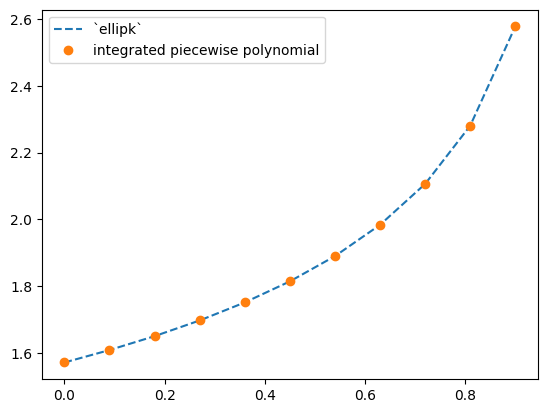

In [15]:
from scipy.interpolate import PchipInterpolator
m = np.linspace(0, 0.9, 11)
x = np.linspace(0, np.pi/2, 70)
y = 1 / np.sqrt(1 - m[:, None]*np.sin(x)**2)


spl = PchipInterpolator(x, y, axis=1)  # the default is axis=0
import matplotlib.pyplot as plt
plt.plot(m, spl.integrate(0, np.pi/2), '--')

from scipy.special import ellipk
plt.plot(m, ellipk(m), 'o')
plt.legend(['`ellipk`', 'integrated piecewise polynomial'])
plt.show()

knots are the points where different polynomial segments are joined together to form a smooth curve. Knots play a crucial role in defining the shape and behavior of the spline curve.


len(c)=len(t)−k−1

In [21]:
x = np.linspace(0, 3/2, 7)
y = np.sin(np.pi*x)
from scipy.interpolate import make_interp_spline
bspl = make_interp_spline(x, y, k=3)
print(len(bspl.t))
print(bspl.t)      #knots
print(len(bspl.c))  #coeffcients
print(bspl.c)

11
[0.   0.   0.   0.   0.5  0.75 1.   1.5  1.5  1.5  1.5 ]
7
[ 0.          0.5547745   1.21887813  0.78361162 -0.26369362 -1.03236675
 -1.        ]
